<a href="https://colab.research.google.com/github/Tclack88/Lambda/blob/master/precourse/LSDS_Intro_Assignment_4_Inferential_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School, Intro to Data Science, Day 4

## Inferential Statistics Assignment

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import random
from statistics import mean, stdev

# Titanic

Use the [`describe` function in pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) to calculate summary statistics (including mean and standard deviation) for `age` and `fare`.

Think, and be ready to discuss: How do these two features compare in their central tendency and in their spread?

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv', index_col=0)
features = ['age', 'fare']
df.dropna(subset=features, inplace=True)

In [0]:
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  714.000000  714.000000  714.000000  714.000000  714.000000  714.000000
mean     0.406162    2.236695   29.699118    0.512605    0.431373   34.694514
std      0.491460    0.838250   14.526497    0.929783    0.853289   52.918930
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   20.125000    0.000000    0.000000    8.050000
50%      0.000000    2.000000   28.000000    0.000000    0.000000   15.741700
75%      1.000000    3.000000   38.000000    1.000000    1.000000   33.375000
max      1.000000    3.000000   80.000000    5.000000    6.000000  512.329200


Plot histograms for both features.

Think, and be ready to discuss: What do you notice about the shape of these distributions?

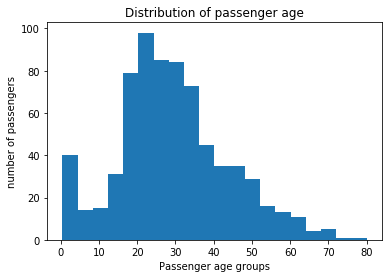

In [0]:
plt.hist(df.age,bins=20)
plt.xlabel("Passenger age groups")
plt.ylabel("number of passengers")
plt.title("Distribution of passenger age")
plt.show()

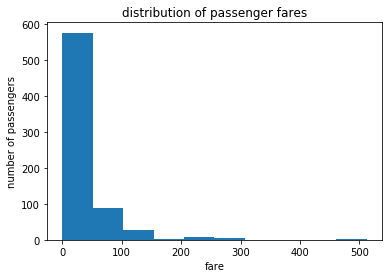

In [0]:
plt.hist(df.fare)
plt.title("distribution of passenger fares")
plt.xlabel("fare")
plt.ylabel("number of passengers")
plt.show()

# Clumsy Carl

Re-do the Clumsy Carl problem -- but suppose that Carl broke **2** of 5 dishes. What's the p-value?

Think, and be ready to discuss: Would you reject the null hypothesis?

Suggestion: You can look at the lecture notebook, but **don't copy-paste** from it!

> You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons. —*[Learn Python the Hard Way](https://learnpythonthehardway.org/book/intro.html)*

---

Here's the problem restated:

Imagine a restaurant employs five dishwashers:
- Alice
- Bob
- Carl
- Dave
- Eric

One week, they break five dishes -- and Carl breaks **two** of the five. So, his coworkers have a hypothesis: Carl is clumsy!

Carl says no, it was just bad luck and random chance: it could have happened to anybody. We can call this the null hypothesis.

Can we do some math to help answer this argument? What's the probability it was just bad luck?

We can write a Monte Carlo simulation to estimate the probability that Carl breaks at least four of the five dishes, assuming that breaking a dish is a truly random event. (We'll assume that the dishwashers have identical workloads and skills.)


In [0]:
dishwashers = ['Alice', 'Bob', 'Carl', 'Dave', 'Eric']

In [0]:
carl_broken_dishes = []
for _ in range(10000):
  carl_breaks = random.choices(dishwashers,k=5).count("Carl")
  carl_broken_dishes.append(carl_breaks)

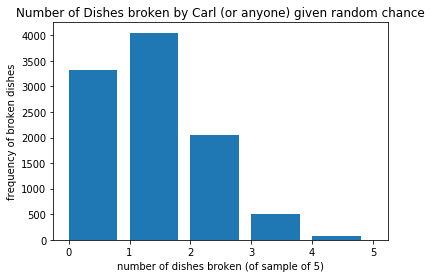

pvalue: 0.2637
pvalue > .05, therefore breaking 2 dishes is within the realm of likelihood


In [0]:

import numpy as np

plt.hist(carl_broken_dishes, width = .8)
plt.plot()
plt.title("Number of Dishes broken by Carl (or anyone) given random chance")
plt.xlabel("number of dishes broken (of sample of 5)")
plt.ylabel("frequency of broken dishes")
plt.show()

pvalue = sum([instance >= 2 for instance in carl_broken_dishes]) / len(carl_broken_dishes)
print("pvalue:",pvalue)
print("pvalue > .05, therefore breaking 2 dishes is within the realm of likelihood")

# Two dice

Simulate the distribution of adding two dice.

What is the mean? Standard deviation?

In [0]:
dice = list("123456")

def roll():
  roll1 = int(random.choice(dice))
  roll2 = int(random.choice(dice))
  return roll1+roll2

rolls = [roll() for _ in range(10000)]

print("mean:",mean(rolls),"\nstandard deviation:",stdev(rolls))

mean: 6.9976 
standard deviation: 2.4263517795851097


What is the standard score (z score) of rolling a 10?

In [0]:
zscore = (10-mean(rolls))/stdev(rolls)
print("zscore of rolling a 10:",zscore)

zscore of rolling a 10: 1.237413315439936


What is the probability of rolling a 10 or higher?

In [0]:
print("probability of rolling 10 or higher:",sum([roll >= 10 for roll in rolls])/len(rolls))

probability of rolling 10 or higher: 0.1665


# Harvest

Using bootstrap resampling, calculate the 95% confidence interval for mean apple weight ...

In [0]:
def bootstrap_sample(items):
    # Random resample *with replacement*
    return random.choices(items, k=len(items))

def percentile(x, p):
    # x: List of numbers
    # p: Percentile, between 0 and 100
    i = round((len(x) - 1) * p/100)
    return sorted(x)[i]

apples = [.5, .4, .5, .6, .3, .7]

In [0]:
sample_means = [mean(bootstrap_sample(apples)) for sample in range(10000)]

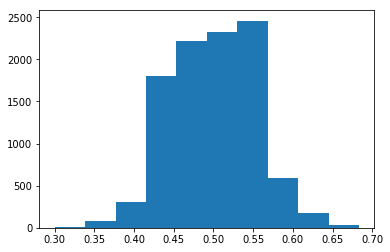

In [0]:
plt.hist(sample_means)
plt.show()

In [0]:
print("95% confidence interval for mean apple weight:",percentile(sample_means,2.5),"to",percentile(sample_means,97.5))

95% confidence interval for mean apple weight: 0.4 to 0.6


... and for mean pumpkin weight:

In [0]:
pumpkins = [1, 1, 1, 3, 3, 591]

In [0]:
pumpkin_sample_means = [mean(bootstrap_sample(pumpkins)) for sample in range(10000)]

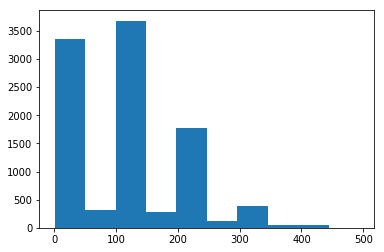

In [0]:
plt.hist(pumpkin_sample_means)
plt.show()

In [0]:
print("95% confidence interval for mean pumpkin weight:",percentile(pumpkin_sample_means,2.5),"to",percentile(pumpkin_sample_means,97.5))

95% confidence interval for mean pumpkin weight: 1.3333333333333333 to 296.6666666666667
